In [2]:
import glob
import pandas as pd
import pylab as plt
import seaborn as sns

In [3]:
evaluation = (pd.concat([pd.read_excel(path)
            .assign(type=path[:-16]) for path in glob.glob('*_evaluation.xlsx')], sort=True)
 .reset_index(False)
 .rename({'index': 'name'}, axis=1))

def get_model_family(name):
    if name.startswith('MLP'):
        return 'Neural'
    elif name.startswith('GradientBoosting') or name.startswith('RandomForest'):
        return 'Tree'
    else:
        return 'Linear'
    
evaluation['family'] = evaluation['name'].apply(get_model_family)

In [10]:
evaluation.sort_values('explained_variance_score', ascending=False)

,name,accuracy_score,explained_variance_score,f1_score_micro,mean_absolute_error,r2_score,threshold_socre,type,family
18,MLP 128,0.5165,0.6246,0.5165,0.6471,0.6242,0.9245,regression,Neural
20,MLP 64,0.4808,0.6128,0.4808,0.6697,0.6127,0.9135,regression,Neural
13,GradientBoostingClassifier,0.5275,0.6128,0.5275,0.6202,0.6128,0.9093,probs_avg_classification,Tree
11,MLP 128,0.5302,0.6112,0.5302,0.6279,0.6112,0.9176,probs_avg_classification,Neural
12,MLP 32,0.5275,0.6064,0.5275,0.6342,0.6063,0.9121,probs_avg_classification,Neural
15,MLP 64,0.5371,0.6047,0.5371,0.6320,0.6047,0.9080,probs_avg_classification,Neural
21,MLP 32,0.4643,0.6030,0.4643,0.6797,0.6028,0.9052,regression,Neural
19,MLP 16,0.4725,0.5996,0.4725,0.6818,0.5995,0.9135,regression,Neural
14,MLP 16,0.4986,0.5836,0.4986,0.6548,0.5836,0.9093,probs_avg_classification,Neural
22,GradientBoostingRegressor,0.4505,0.5737,0.4505,0.6981,0.5737,0.8997,regression,Tree


In [12]:
family2marker

NameError: name 'family2marker' is not defined

In [13]:
type2color

NameError: name 'type2color' is not defined

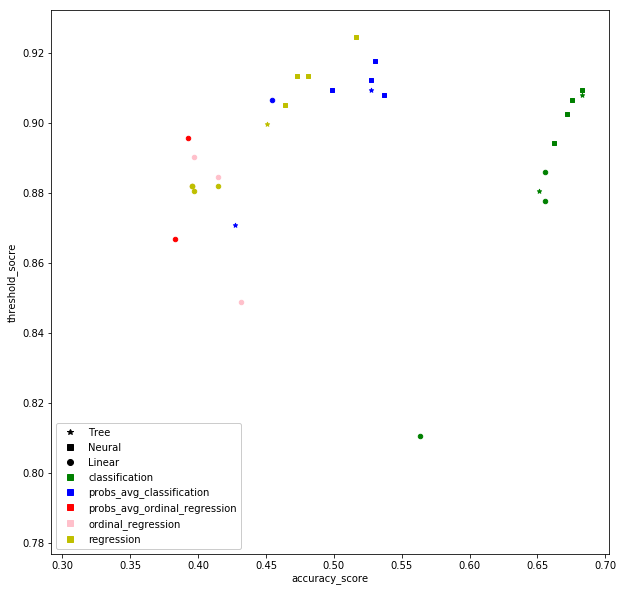

In [27]:
markers = ['o', 's', '*', 'v', '^', 'D', 'h', 'x', '+', '8', 'p', '<', '>', 'd', 'H']
colors = ['r', 'g', 'b', 'y', 'pink']

f, ax = plt.subplots(1, figsize=(10, 10))

make_handle = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = []
labels = []
family2marker = dict(zip(evaluation['family'].unique(), markers))
type2color = dict(zip(evaluation['type'].unique(), colors))
        
for family, marker in family2marker.items():
    labels.append(family)
    handles.append(make_handle(marker, 'k'))

for type_, color in type2color.items():
    labels.append(type_)
    handles.append(make_handle('s', color))
   

for family, family_group in evaluation.groupby('family'):
    for type_, type_group in family_group.groupby('type'):
        type_group.plot(kind='scatter', x='accuracy_score', y='threshold_socre',
                        marker=family2marker[family], color=type2color[type_],
                        ax=ax)

        
     

ax.legend(handles, labels, loc=3, framealpha=1)


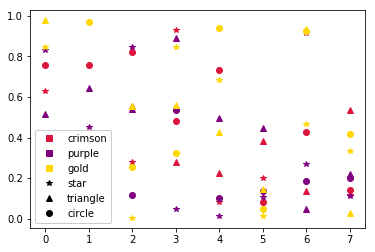

In [5]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.rand(8,10)
data[:,0] = np.arange(len(data))

markers=["*","^","o"]
colors = ["crimson", "purple", "gold"]


for i in range(data.shape[1]-1):
    plt.plot(data[:,0], data[:,i+1], marker=markers[i%3], color=colors[i//3], ls="none")

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]

handles = [f("s", colors[i]) for i in range(3)]
handles += [f(markers[i], "k") for i in range(3)]

labels = colors + ["star", "triangle", "circle"]

plt.legend(handles, labels, loc=3, framealpha=1)

plt.show()

In [6]:
handles